# **Yefer Villate Cortes**
## Grupo 202016908_34
### Tarea 4 Algoritmos de Aprendizaje no supervisado
## **El lenguaje a utilizar es Python, el cual se trabajará mediante Jupyter notebooks, utilizando Anaconda.**
### https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
### Dataset k-means e hierarchical clustering - Mall Customer Segmentation Data:
###   **Este dataset contiene información de clientes de un mall. Las variables incluyen género, ingreso, puntaje de gasto, etc.**
### Con el dataset anterior diseñar los modelos de Clustering (agrupación): K-means e hierarchical clustering. 

## **Para cada algoritmo realizar los siguientes pasos:**
### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
### 4. Entrenar el modelo configurando los diferentes hiperparámetros.
### 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.
### 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo
### 7. Interpretar, analizar y documentar los resultados obtenidos.

## **2. Clustering Jerárquico (Hierarchical Clustering)**
### **1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.**

In [83]:
# Importamos las librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score, silhouette_samples
                            )

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist

In [85]:
# Cargamos el dataset
df = pd.read_csv('C:/Users/AD2025/Mall_Customers.csv')

In [87]:
# Realizamos el Análisis exploratorio
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: >

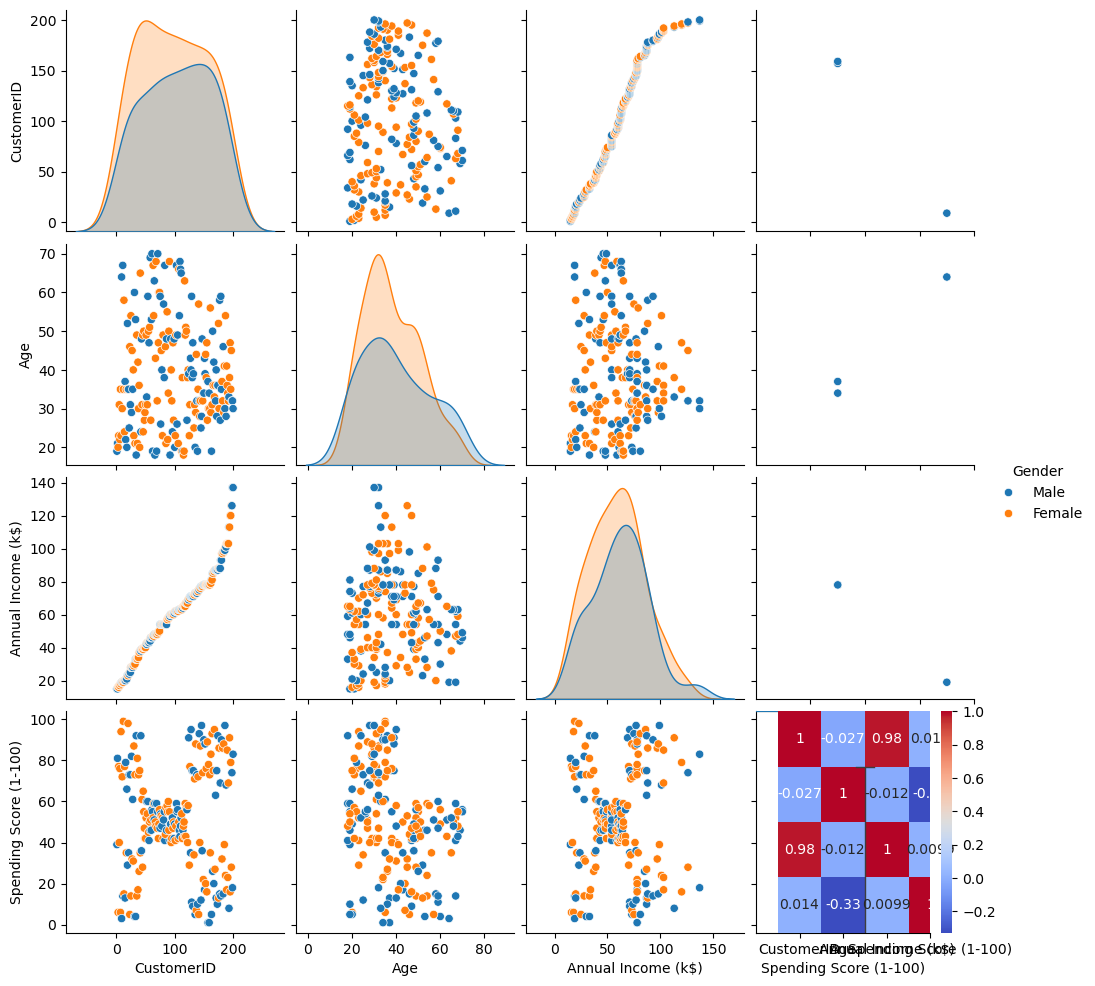

In [89]:
# Visualizamos
sns.pairplot(df, hue='Gender')
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
sns.boxplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

### **2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.**

In [103]:
# Codificación de variable categórica
df_encoded = df.copy()
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 0, 'Female': 1})

# Selección de columnas relevantes
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df_encoded[features]

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.**

In [106]:
# En este caso, ya seleccionamos manualmente las más relevantes para clustering: Edad, Ingreso anual y Puntaje de gasto. 
# Podemos aplicar PCA para visualizar mejor:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

### **4. Entrenar el modelo de clustering jerárquico.**

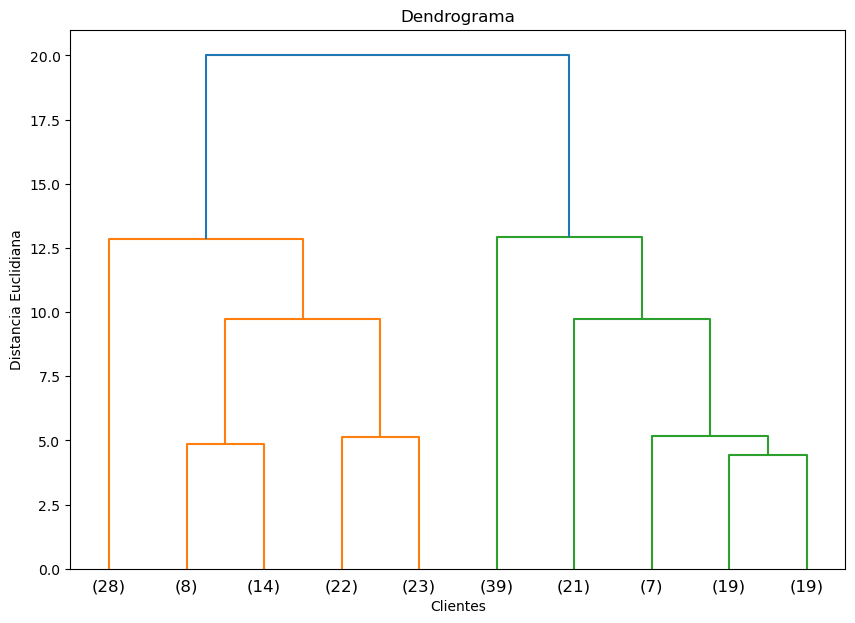

In [95]:
# Clustering jerárquico 
# Crear el linkage
linked = linkage(X_scaled, method='ward')

# Visualizar dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=10)
plt.title("Dendrograma")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclidiana")
plt.show()

### **5. Evaluar el desempeño del modelo con métricas como Coeficiente de correlación cophenética, Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.**

In [97]:
# Coeficiente de correlación cophenética
coph_corr, _ = cophenet(linked, pdist(X_scaled))
print(f"Coeficiente de correlación cophenética: {coph_corr:.3f}")

# === Evaluación de varios K ===
ks = [3, 4, 5]
silhouette_scores = []
ch_scores = []
db_scores = []

for k in ks:
    clusters_k = fcluster(linked, k, criterion='maxclust')
    silhouette_scores.append(silhouette_score(X_scaled, clusters_k))
    ch_scores.append(calinski_harabasz_score(X_scaled, clusters_k))
    db_scores.append(davies_bouldin_score(X_scaled, clusters_k))

Coeficiente de correlación cophenética: 0.626


In [66]:
# Mostremos los resultados en una tabla
resultados = pd.DataFrame({
    'K': ks,
    'Silhouette': silhouette_scores,
    'Calinski-Harabasz': ch_scores,
    'Davies-Bouldin': db_scores
})
print("\nMétricas por número de clusters:")
print(resultados)


Métricas por número de clusters:
   K  Silhouette  Calinski-Harabasz  Davies-Bouldin
0  3    0.321489          88.101741        1.127729
1  4    0.361451         102.019399        1.016382
2  5    0.390028         107.826560        0.916289


### **6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.**

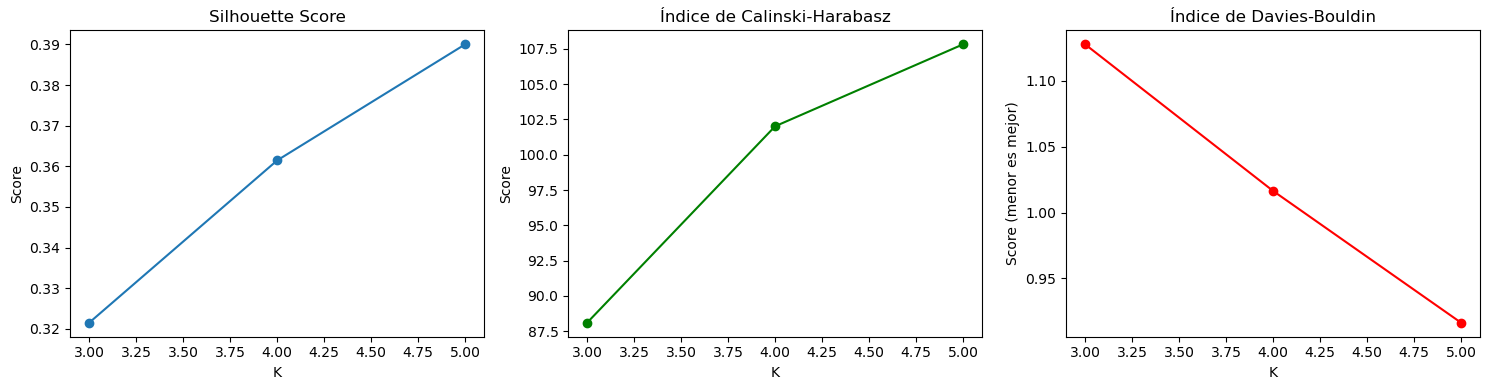

In [69]:
# Visualizamos las métricas

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(ks, silhouette_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("K")
plt.ylabel("Score")

plt.subplot(1, 3, 2)
plt.plot(ks, ch_scores, marker='o', color='green')
plt.title("Índice de Calinski-Harabasz")
plt.xlabel("K")
plt.ylabel("Score")

plt.subplot(1, 3, 3)
plt.plot(ks, db_scores, marker='o', color='red')
plt.title("Índice de Davies-Bouldin")
plt.xlabel("K")
plt.ylabel("Score (menor es mejor)")

plt.tight_layout()
plt.show()


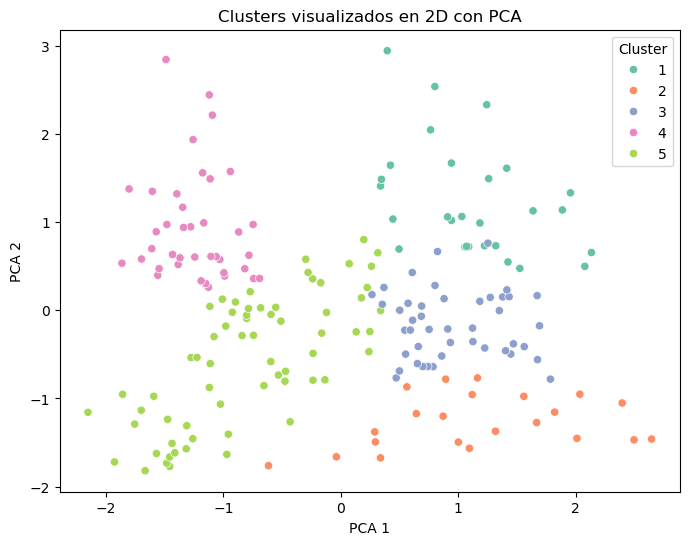

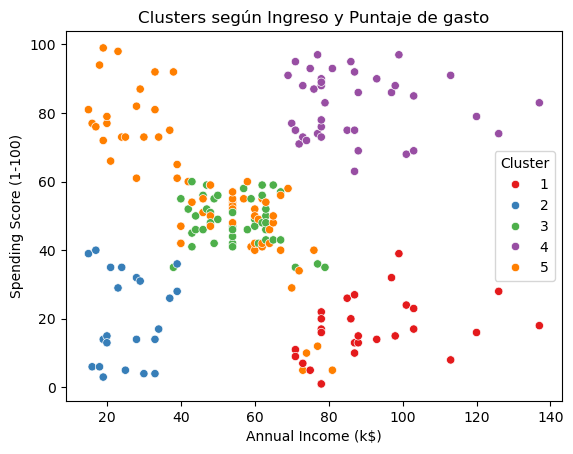

In [109]:
# Visualizamos finalmente con mejor K (ej. K=5)
n_clusters = 5
clusters = fcluster(linked, n_clusters, criterion='maxclust')
df_encoded['Cluster'] = clusters

# Gráficamos con PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title('Clusters visualizados en 2D con PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

# Visualización directa: ingreso vs gasto
sns.scatterplot(data=df_encoded, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title('Clusters según Ingreso y Puntaje de gasto')
plt.show()

### **7. Interpretar, analizar y documentar los resultados obtenidos.**

In [123]:
# Veamos estadísticas por grupo
print("\nPromedios por cluster:")
print(df_encoded.groupby('Cluster')[features].mean())


Promedios por cluster:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
1        43.892857           91.285714               16.678571
2        44.318182           25.772727               20.272727
3        56.400000           55.288889               48.355556
4        32.692308           86.538462               82.128205
5        26.560606           47.363636               56.787879


| Edad | (avg) | Ingreso (k$ avg) |	Score de Gasto (avg) | Interpretación|
|:---: |:---:  |:---:             |:---:                 |---            |
|1     | 43.9  | 91.3 | 16.7 |Clientes mayores con alto ingreso, pero gastan poco. Posiblemente clientes conservadores o poco interesados en consumir.|
|2	   | 44.3  | 25.8 | 20.3  |Clientes mayores con bajo ingreso y bajo gasto. Poco atractivos comercialmente.|
|3     | 56.4  | 55.3 | 48.4  |Clientes muy mayores con ingreso medio y gasto medio. Segmento más neutral.|
|4     | 32.7  | 86.5 | 82.1  |Clientes jóvenes-adultos con alto ingreso y alto gasto. Perfil ideal para estrategias de marketing.|
|5     | 26.6  | 47.4 | 56.8   |Clientes jóvenes con ingreso medio y gasto medio-alto. Buen potencial de fidelización a largo plazo.|

In [135]:
# Veamos las metricas por numero de clusers

print("\nMétricas por número de clusters:")
print(resultados)


Métricas por número de clusters:
   K  Silhouette  Calinski-Harabasz  Davies-Bouldin
0  3    0.321489          88.101741        1.127729
1  4    0.361451         102.019399        1.016382
2  5    0.390028         107.826560        0.916289


#### **•	K=3:**
##### Silhouette: 0.3215 – La cohesión y separación no son muy altas; indica clusters algo solapados.
##### Calinski-Harabasz: 88.10 – Valor relativamente bajo, sugiriendo menos estructura en los clusters.
##### Davies-Bouldin: 1.128 – Valor moderado; valores más bajos indican clusters mejor definidos.

#### **•	K=4:**
##### Silhouette: 0.3615 – Mejora respecto a 3, indica mejor separación.
##### Calinski-Harabasz: 102.02 – Mejora, sugiriendo mejor agrupamiento.
##### Davies-Bouldin: 1.016 – Mejor que en K=3, menor valor que indica mejores clusters.

#### **•	K=5:**
##### Silhouette: 0.3900 – Mejor aún, mayor coeficiente, más cohesión y separación.
##### Calinski-Harabasz: 107.83 – Mayor valor, indica una estructura más definida.
##### Davies-Bouldin: 0.916 – El más bajo, sugiriendo los clusters más diferenciados aquí.

#### **La tendencia muestra que incrementando el número de clusters mejora las métricas hasta K=5, que parece ser la opción más adecuada según estos indicadores**

##### **El coeficiente de correlación cophenética de 0.626 indica qué tan bien el árbol o dendrograma generado por el método de clustering refleja las similitudes originales entre los datos. Un valor cercano a 1 significa que la agrupación es muy fiel a las distancias originales, mientras que un valor más bajo (como 0.626) sugiere una relación moderada, con cierta pérdida de precisión en la representación de las similitudes.**